<a href="https://colab.research.google.com/github/Victor-Ribeiro-Acosta/Treinamento-Rede-YOLO-para-Deteccao-Objetos/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Objetos_com_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 7.15 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.


In [18]:
%cd darknet
!ls

/content/darknet
cfg   examples	LICENSE       LICENSE.gen  LICENSE.meta  LICENSE.v1  python	scripts
data  include	LICENSE.fuck  LICENSE.gpl  LICENSE.mit	 Makefile    README.md	src


In [19]:
!pwd

/content/darknet


In [ ]:
!make

In [21]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-05-26 00:37:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  51.6MB/s    in 4.6s    

2024-05-26 00:37:20 (51.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

In [23]:
import cv2
import matplotlib.pyplot as plt
def img_show(imagem):
  img = cv2.imread(imagem)
  figura = plt.gcf()
  figura.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

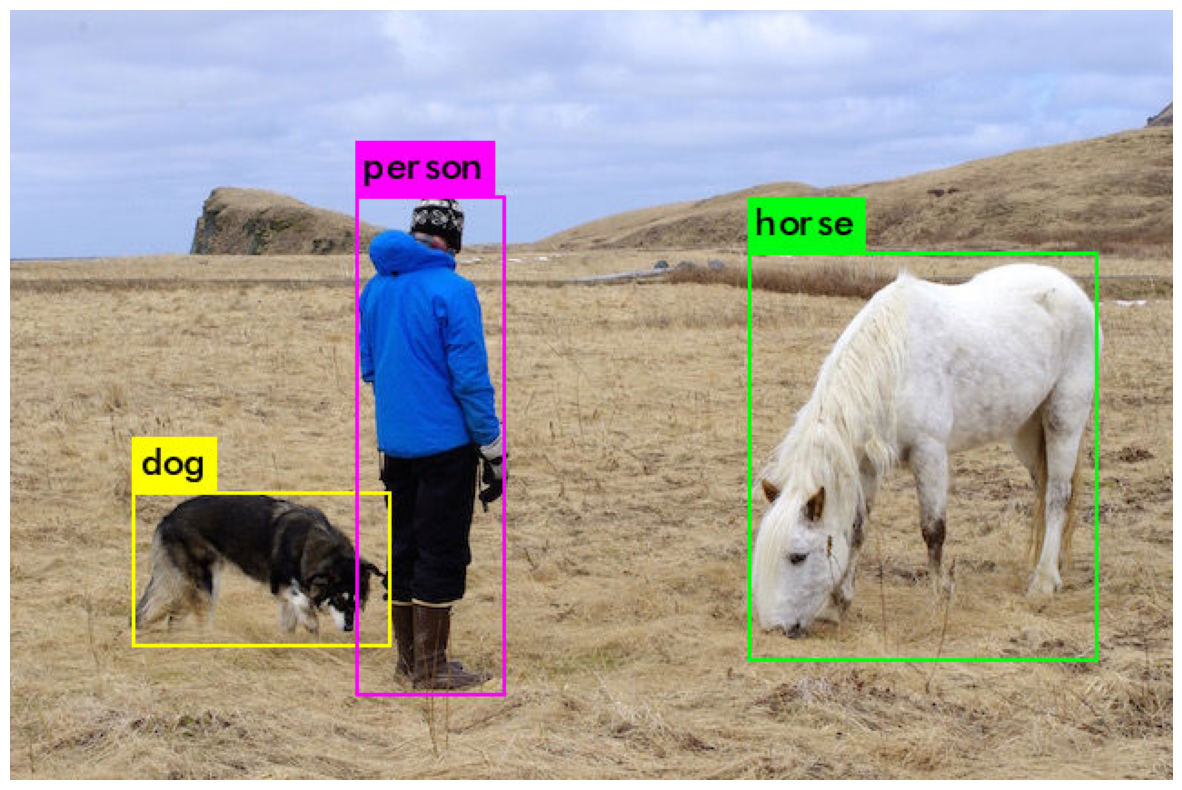

In [24]:
img_show('predictions.jpg')

# Transfer Learning

Baixando dados de Pascal VOC

In [ ]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

Descompactando arquivos

In [27]:
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

tar: Unexpected EOF in archive
tar: rmtlseek not stopped at a record boundary
tar: Error is not recoverable: exiting now


Baixando e executando módulo que cria os arquivos txt de treino e teste para cada conjunto de dados

In [28]:
!wget https://pjreddie.com/media/files/voc_label.py

--2024-05-26 01:10:10--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [text/x-python]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-05-26 01:10:11 (1023 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [29]:
!python voc_label.py

Unindo todos os arquivos de treino em um único txt

In [31]:
!mkdir train_test_arquives

In [ ]:
!mv 2007_test.txt /content/darknet/train_test_arquives
!mv 2007_train.txt /content/darknet/train_test_arquives
!mv 2007_val.txt /content/darknet/train_test_arquives
!mv 2012_train.txt /content/darknet/train_test_arquives
!mv 2012_val.txt /content/darknet/train_test_arquives

In [36]:
%cd train_test_arquives/
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

/content/darknet/train_test_arquives


In [37]:
%cd ..

/content/darknet


Em voc.data, fazer as seguintes configurações

- classes= 20
- train  = /content/darknet/train_test_arquives/train.txt
- valid  = /content/darknet/train_test_arquives/2007_test.txt
- names = data/voc.names
- backup = backup

Baixando pesos pré-trinados para o novo treinamento

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

Realizando o transfer learning

In [ ]:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg darknet53.conv.74